In [1]:
import decision_functions as hmd
import pandas as pd
from itertools import combinations
%matplotlib inline

In [21]:
class Decision():
    """
    A class to easily store previous decisions
    """
    def __init__(self):
        self.feature_list = hmd.get_feature_list()
        self.feature_dict = hmd.set_feature_importance(self.feature_list)
        self.option_list = hmd.get_option_list()
        self.option_dict = hmd.rate_each_option(self.feature_list, self.option_list)
        self.option_value_df = self.update_option_value_df()
        
    def update_option_value_df(self):
        return pd.DataFrame.from_dict(self.option_dict).merge(
            pd.DataFrame(self.feature_dict).T, left_index=True, right_index=True)
        
    def update_option_dict(self, feature=None, option=None):
        """
        If the option is not in the keys, option will be added and function will request user input to rate.
        if option is in the keys, option key value pair will be removed.
        
        Parameters
        ----------
        feature: str
            The feature key that will be added or removed. 
            If added, will rate all options on this new feature
        
        option: str
            The key that will be added or removed. 
            If added, will rate all features in this new option
        """
        
        if feature != None:
            try:
                for k in self.option_dict.keys:
                    self.option_dict[k].pop(feature)
            except:
                self.option_dict.update(hmd.rate_each_option([feature], self.option_list))
        
        elif option != None:
            try:
                self.option_dict.pop(option)            
            except:
                self.option_dict.update(hmd.rate_each_option(self.feature_list, [option]))
        
        print(self.option_dict)
        self.update_option_value_df(self)
        return
    
    def update_option_list(self, option):
        """
        If option is not in the list, option will be added to list
        If option is in list, option will be removed.
        
        Parameters
        ----------
        option: str
            the feature that will be added or removed
        """
        try:
            self.option_list.remove(option)
        except:
            self.option_list.append(option)
                                    
        print('New option list:\n', self.option_list)
        
        self.update_option_dict(self, None, option)
        return
    
    def update_feature_dict(self, feature):
        """
        If the feature is not in the keys, feature will be added and function will request user input to rate.
        if feature is in the keys, feature key value pair will be removed.
        
        Parameters
        ----------
        feature: str
            the key that will be added or removed
        """
        try:
            self.feature_dict.pop(feature)
        except:
            self.feature_dict.update(hmd.set_feature_importance([feature]))
        
        print('New feature list:\n', self.feature_list)
        
        self.update_option_dict(self, feature, None)
        return
    
    def update_feature_list(self, feature):
        """
        If feature is not in the list, feature will be added to list
        If feature is in list, feature will be removed.
        
        Parameters
        ----------
        feature: str
            the feature that will be added or removed
        """
        try:
            self.feature_list.remove(feature)
        except:
            self.feature_list.append(feature)
                                    
        print('New feature list:\n', self.feature_list)
        
        self.update_feature_dict(self, feature)
        return
    
    def print_results(self):
        hmd.print_scores(self.option_value_df, self.option_list)
        
    def plot_radar(self):
        for pair in list(combinations(self.option_list, 2)):
            hmd.dual_radar_plot(self.option_value_df, pair)
        
    def plot_venn2(self):
        for pair in list(combinations(self.option_list, 2)):
            hmd.create_venn2(self.option_value_df, list(pair))
        
    def plot_venn3(self):
        for triple in list(combinations(self.option_list, 3)):
            hmd.create_venn3(self.option_value_df, list(triple))

In [22]:
abstract = Decision()

Please enter a feature you will use to make your decision:
feature1
Would you like to add another feature? (Y/N)
y
Please enter a feature you will use to make your decision:
feature2
Would you like to add another feature? (Y/N)
n
Imagine you have 10 points to assign to your 2 features.

Assign a nonnegative whole number to each of the following features making sure the total sums to 10.
You have 10 points left,
and 2 more features to value.

How much do you value feature2?	6
You have 4 points left,
and 1 more features to value.

How much do you value feature1?	4
Please enter the first option you need to compare:
option1
Would you like to add another option? (Y/N)
y
Please enter the next option you are comparing:
option2
Would you like to add another option? (Y/N)
n
Out of 10, how do you rate option1 in terms of feature2?
9
Out of 10, how do you rate option1 in terms of feature1?
4
Out of 10, how do you rate option2 in terms of feature2?
8
Out of 10, how do you rate option2 in terms of 

AttributeError: 'NoneType' object has no attribute 'set_text'

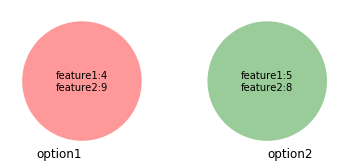

In [26]:
abstract.plot_venn2()

In [17]:
option1={'feature3': 6, 'feature2': 7, 'feature4': 7, 'feature1': 8}
option1.update({'feature5':10})
option1

{'feature3': 6, 'feature2': 7, 'feature4': 7, 'feature1': 8, 'feature5': 10}